# Desarrollo del caso de estudio

In [ ]:
# Importar librerías y dependencias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las gráficas
sns.set_theme(style="whitegrid", palette="Set2")

In [2]:
# 1. Generar un dataset simulado con 5000 con el código que se incluye en el anexo.

import pandas as pd
import numpy as np

# Reproducibilidad
np.random.seed(42)
n = 5000

# Variables simuladas (con lógica de negocio y distribución normal)
inventario = np.random.normal(loc=500, scale=80, size=n).clip(100, 1000) # Unidades disponibles
promocion = np.random.normal(loc=200, scale=60, size=n).clip(0) # Gasto en promociones ($)
canal_ecommerce = np.random.normal(loc=0.4, scale=0.15, size=n).clip(0, 1) # % de ventas online
descuento_promedio = np.random.normal(loc=10, scale=3, size=n).clip(0, 30) # % descuento aplicado
dias_inventario = np.random.normal(loc=15, scale=5, size=n).clip(1, 60) # Días promedio en stock
clima_favorable = np.random.normal(loc=0.6, scale=0.2, size=n).clip(0, 1) # Índice clima favorable para deportes
eventos_deportivos = np.random.normal(loc=0.3, scale=0.2, size=n).clip(0, 1) # Probabilidad de eventos que impulsan ventas

# Variable dependiente: Ventas
ventas = (
20 +
0.05 * inventario +
0.04 * promocion +
18 * canal_ecommerce +
1.5 * descuento_promedio +
-0.6 * dias_inventario +
25 * clima_favorable +
30 * eventos_deportivos +
np.random.normal(0, 15, n) # Ruido aleatorio
)

# Fechas
fechas = pd.date_range(start="2015-01-01", periods=n, freq="D")

# Dataset final
df = pd.DataFrame({
    'Fecha': fechas,
'Inventario': inventario,
'Promocion': promocion,
'Canal_ecommerce': canal_ecommerce,
'Descuento_promedio': descuento_promedio,
'Dias_inventario': dias_inventario,
'Clima_favorable': clima_favorable,
'Eventos_deportivos': eventos_deportivos,
'Ventas': ventas
})

# Guardar el dataset en un archivo CSV
df.to_csv('ventas_simuladas.csv', index=False)

In [7]:
# 2. Explorar el dataset con .head(), .info(), y .describe().
df.head()

,Fecha,Inventario,Promocion,Canal_ecommerce,Descuento_promedio,Dias_inventario,Clima_favorable,Eventos_deportivos,Ventas
0,2015-01-01,539.737132,174.574419,0.298226,9.569730,16.741431,0.634175,0.000000,93.213469
1,2015-01-02,488.938856,172.795153,0.354175,9.902032,16.416618,0.602451,0.089003,104.835649
2,2015-01-03,551.815083,92.261410,0.310393,10.192885,10.317401,0.513769,0.182594,89.471981
3,2015-01-04,621.842389,180.194588,0.416563,12.840584,17.897921,0.599495,0.329934,95.378721
4,2015-01-05,481.267730,243.969745,0.579577,7.758348,7.549587,0.698168,0.504832,87.960638


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               5000 non-null   datetime64[ns]
 1   Inventario          5000 non-null   float64       
 2   Promocion           5000 non-null   float64       
 3   Canal_ecommerce     5000 non-null   float64       
 4   Descuento_promedio  5000 non-null   float64       
 5   Dias_inventario     5000 non-null   float64       
 6   Clima_favorable     5000 non-null   float64       
 7   Eventos_deportivos  5000 non-null   float64       
 8   Ventas              5000 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 351.7 KB


In [9]:
df.describe()

,Fecha,Inventario,Promocion,Canal_ecommerce,Descuento_promedio,Dias_inventario,Clima_favorable,Eventos_deportivos,Ventas
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2021-11-04 12:00:00,500.448154,199.428148,0.401817,10.050043,14.911732,0.597071,0.304440,90.356965
min,2015-01-01 00:00:00,240.698613,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,28.982627
25%,2018-06-03 18:00:00,447.367597,158.805026,0.300867,8.005958,11.491199,0.460155,0.158351,78.078442
50%,2021-11-04 12:00:00,501.077247,198.952968,0.401488,10.057777,14.959916,0.599791,0.295060,90.360080
75%,2025-04-07 06:00:00,553.280849,240.634284,0.501330,12.119844,18.253032,0.735488,0.437812,102.790582
max,2028-09-08 00:00:00,814.099017,411.743311,0.914337,23.437253,33.056750,1.000000,1.000000,159.262797
std,NaN,79.718386,60.553728,0.149138,3.008239,4.906023,0.195806,0.192152,18.114370


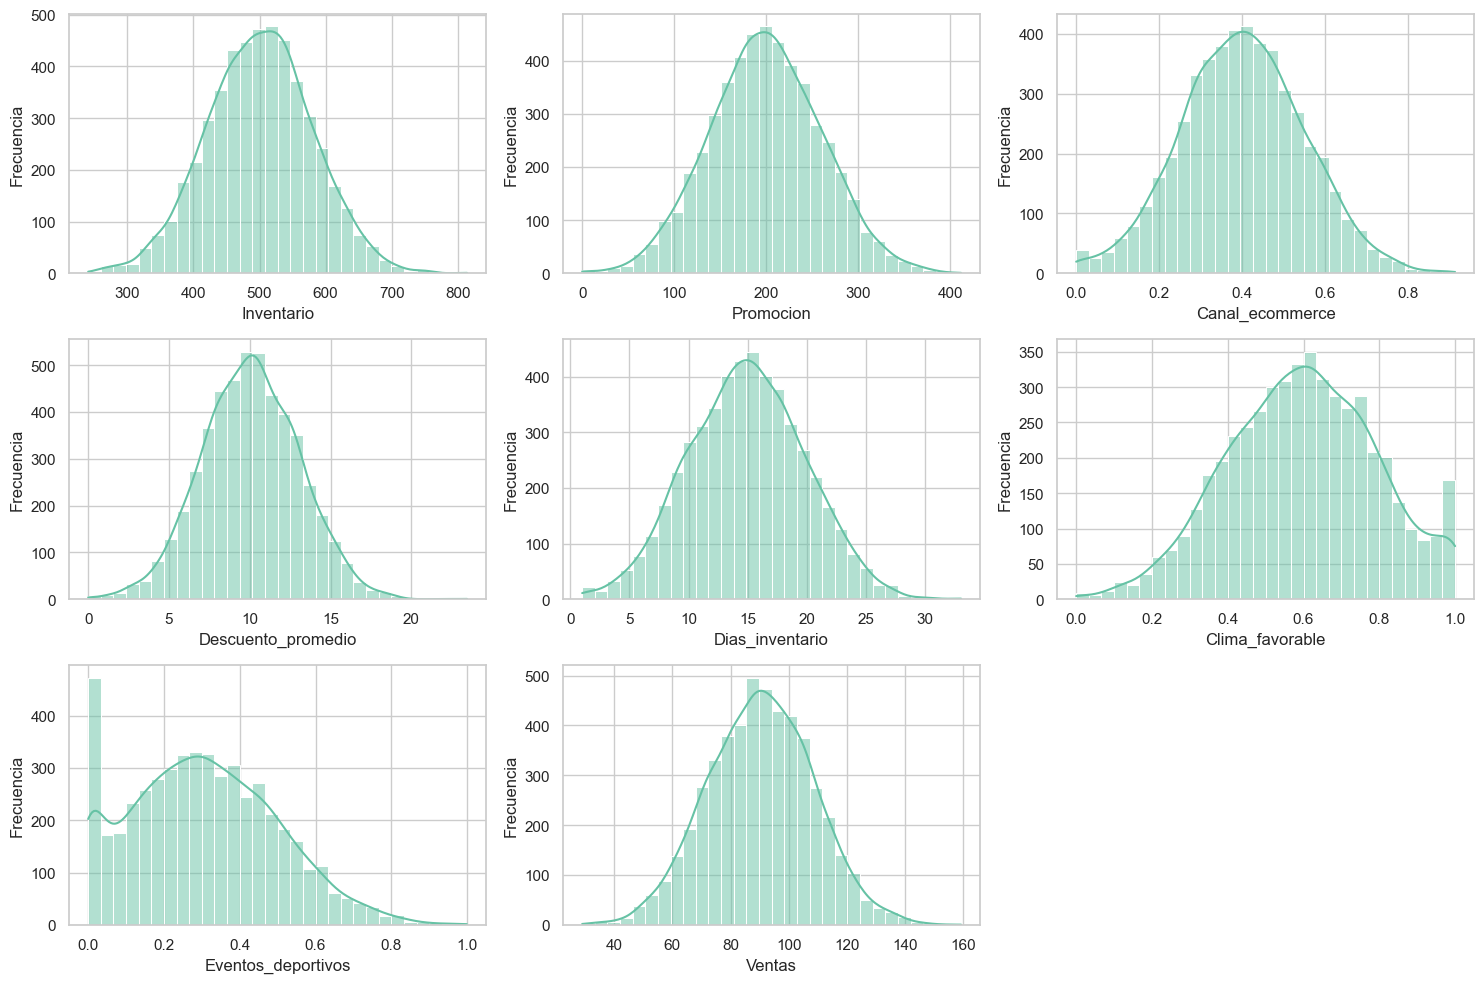

In [ ]:
# 3. Graficar histogramas de todas las variables.

def graficar_histogramas(df):

    num_vars = df.columns.to_list()
    num_vars = [col for col in df.columns if df[col].dtype in ['int64', 'float64']] # Graficar solo las variables numéricas (se excluye Fecha)
    
    plt.figure(figsize=(15, 10))
    
    for i, var in enumerate(num_vars):
        plt.subplot(3, 3, i + 1) # Ajustar el número de subgráficas según el número de variables. Primer argumento es filas, segundo columnas y el tercero el índice
        sns.histplot(df[var], bins=30, kde=True)
        plt.ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()

graficar_histogramas(df)  

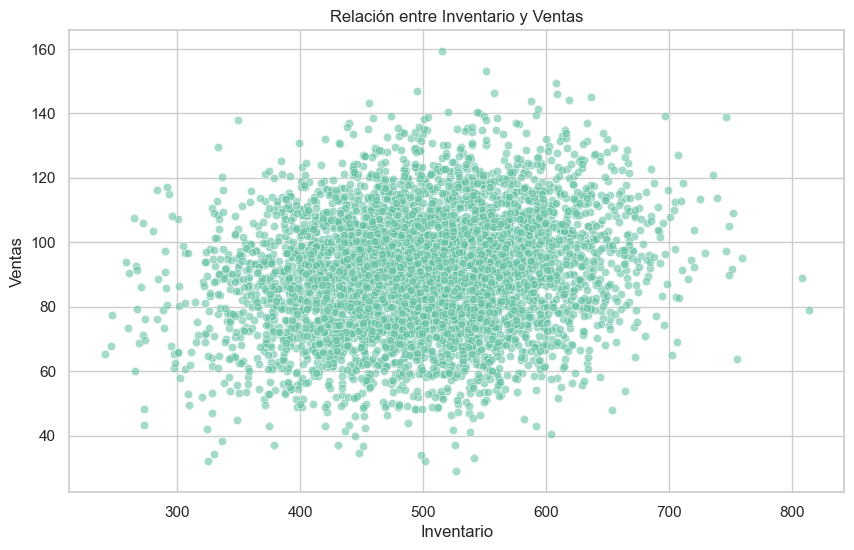

In [ ]:
# 4. Crear un scatterplot entre Inventario y Ventas.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Inventario', y='Ventas', alpha=0.6)
plt.title('Relación entre Inventario y Ventas')
plt.show()

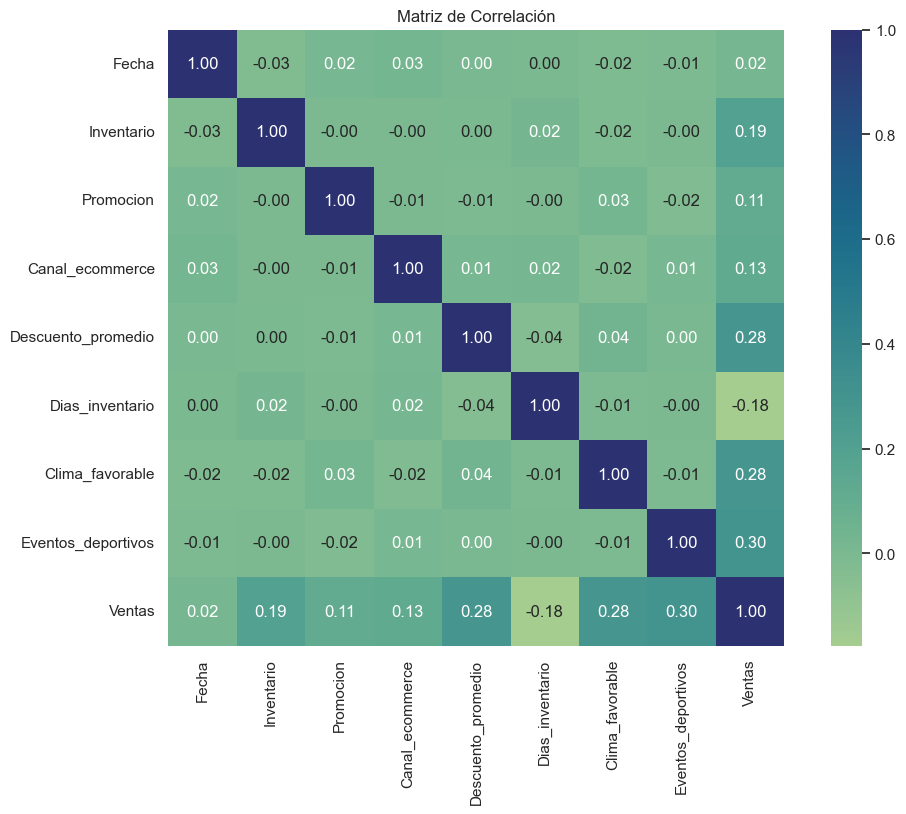

In [34]:
# 5. Calcular y graficar la matriz de correlación con un mapa de calor.
plt.figure(figsize=(12, 8))
correlacion = df.corr() 
sns.heatmap(correlacion, annot=True, cmap='crest', fmt=".2f", square=True)
plt.title('Matriz de Correlación')
plt.show()

In [36]:
correlacion

,Fecha,Inventario,Promocion,Canal_ecommerce,Descuento_promedio,Dias_inventario,Clima_favorable,Eventos_deportivos,Ventas
Fecha,1.000000,-0.028479,0.015601,0.026437,0.004939,0.000172,-0.018976,-0.014457,0.019258
Inventario,-0.028479,1.000000,-0.001952,-0.002275,0.001586,0.022280,-0.018997,-0.003553,0.193084
Promocion,0.015601,-0.001952,1.000000,-0.005999,-0.014215,-0.004713,0.027927,-0.022918,0.114905
Canal_ecommerce,0.026437,-0.002275,-0.005999,1.000000,0.013574,0.018936,-0.022937,0.012377,0.125027
Descuento_promedio,0.004939,0.001586,-0.014215,0.013574,1.000000,-0.035627,0.035953,0.004753,0.280112
Dias_inventario,0.000172,0.022280,-0.004713,0.018936,-0.035627,1.000000,-0.007787,-0.003909,-0.176122
Clima_favorable,-0.018976,-0.018997,0.027927,-0.022937,0.035953,-0.007787,1.000000,-0.007886,0.279251
Eventos_deportivos,-0.014457,-0.003553,-0.022918,0.012377,0.004753,-0.003909,-0.007886,1.000000,0.299577
Ventas,0.019258,0.193084,0.114905,0.125027,0.280112,-0.176122,0.279251,0.299577,1.000000


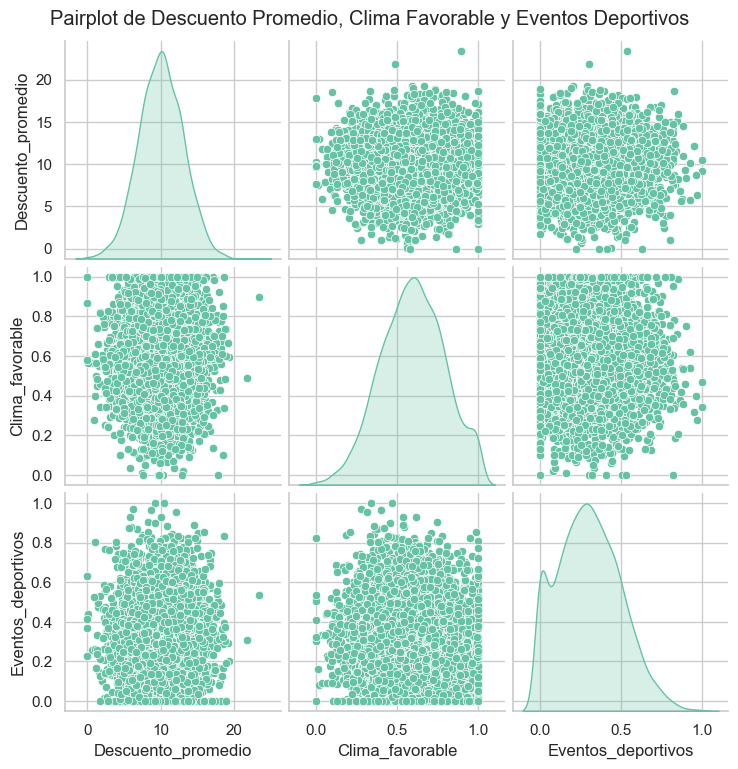

In [35]:
# 6. Visualizar relaciones con un pairplot de al menos 3 variables relevantes.

sns.pairplot(df[['Descuento_promedio', 'Clima_favorable', 'Eventos_deportivos']], diag_kind='kde') # Las tres con mayor correlación con Ventas
plt.suptitle('Pairplot de Descuento Promedio, Clima Favorable y Eventos Deportivos', y=1.02)
plt.show()

Text(0.5, 1.0, 'Coeficientes de Correlación Absoluta con Ventas')

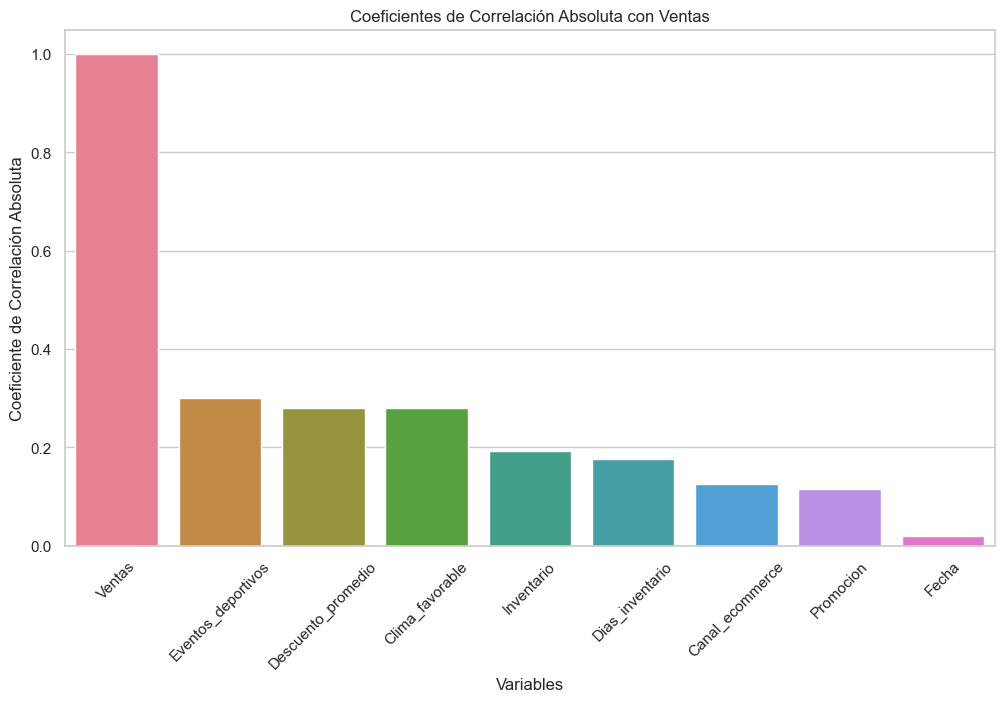

In [44]:
# 7. Crear un gráfico de barras con los coeficientes de correlación absoluta con Ventas.

correlacion_ventas = correlacion['Ventas'].abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacion_ventas.index, y=correlacion_ventas.values, hue=correlacion_ventas.index)
plt.tight_layout()
plt.xticks(rotation=45)
plt.xlabel('Variables')
plt.ylabel('Coeficiente de Correlación Absoluta')
plt.title('Coeficientes de Correlación Absoluta con Ventas')

Coeficiente: 0.043874310728694806
Intercepto: 68.40014722984986


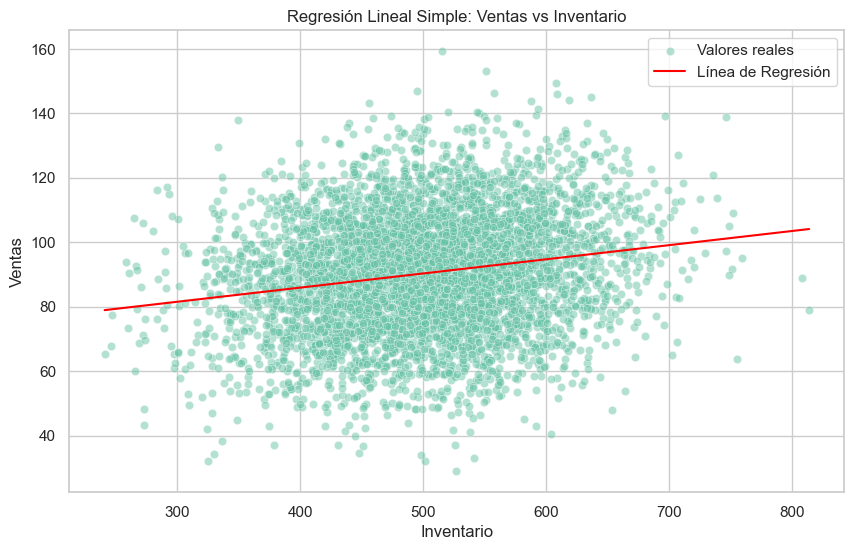

In [63]:
# 8. Realizar una regresión lineal simple para predecir Ventas a partir del Inventario.

from sklearn.linear_model import LinearRegression

# Dividr el dataset
X_inv = df[['Inventario']]
y = df['Ventas']

# Crear el modelo
modelo_simple = LinearRegression()
modelo_simple.fit(X_inv, y)
y_pred_simple = modelo_simple.predict(X_inv)

# 9. Mostrar el coeficiente, intercepto y graficar la línea de regresión.
coeficiente_simple = modelo_simple.coef_[0]
intercepto = modelo_simple.intercept_
print(f"Coeficiente: {coeficiente_simple}")
print(f"Intercepto: {intercepto}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Inventario', y='Ventas', alpha=0.5, label='Valores reales') # Graficar los puntos
sns.lineplot(x=df['Inventario'], y=y_pred_simple, color='red', label='Línea de Regresión') # Graficar la línea de regresión
plt.title('Regresión Lineal Simple: Ventas vs Inventario')
plt.show()

In [62]:
# 10. Calcular el R² y el MSE del modelo simple.
from sklearn.metrics import mean_squared_error, r2_score

r2_simple = r2_score(y, y_pred_simple)
mse_simple = mean_squared_error(y, y_pred_simple)

print(f"R²: {r2_simple}")
print(f"MSE: {mse_simple}")


R²: 0.03728130818823461
MSE: 315.8340900897454


In [ ]:
# 11. Construir una regresión lineal múltiple con todas las variables independientes.
X_multiple = df.drop(columns=['Fecha', 'Ventas']) 
modelo_multiple = LinearRegression()
modelo_multiple.fit(X_multiple, y)
y_pred_multiple = modelo_multiple.predict(X_multiple)

# 12. Mostrar los coeficientes y el intercepto del modelo múltiple.
coeficientes = pd.Series(modelo_multiple.coef_, index=X_multiple.columns)
print('Coeficientes:')
print(coeficientes)
print('Intercepto:', modelo_multiple.intercept_)

Coeficientes:
Inventario             0.046186
Promocion              0.035375
Canal_ecommerce       15.597243
Descuento_promedio     1.579929
Dias_inventario       -0.627176
Clima_favorable       25.383304
Eventos_deportivos    28.438976
dtype: float64
Intercepto: 23.58145984094658


In [74]:
# 13. Calcular el R² y MSE del modelo múltiple.
r2_multiple = r2_score(y, y_pred_multiple)
mse_multiple = mean_squared_error(y, y_pred_multiple)

print(f"R²: {r2_multiple}")
print(f"MSE: {mse_multiple}")

R²: 0.33929551793588464
MSE: 216.75386661313203


In [ ]:
""""plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ventas', y=y_pred_multiple, alpha=0.5)
plt.plot([df['Ventas'].min(), df['Ventas'].max()], [df['Ventas'].min(), df['Ventas'].max()], 'r--') # Línea de referencia
plt.title('Comparación entre Ventas Reales y Predicciones del Modelo Múltiple')
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.show()
"""

In [ ]:
# 14. Comparar resultados entre el modelo simple y el múltiple.
resultados = {'Modelo': ['Simple', 'Múltiple'], 'R²': [r2_simple, r2_multiple], 'MSE': [mse_simple, mse_multiple]} #Los mejores resultados son los más cercanos a 1 para R² y los más cercanos a 0 para MSE

resultados_df = pd.DataFrame(resultados)
resultados_df

,Modelo,R²,MSE
0,Simple,0.037281,315.834090
1,Múltiple,0.339296,216.753867


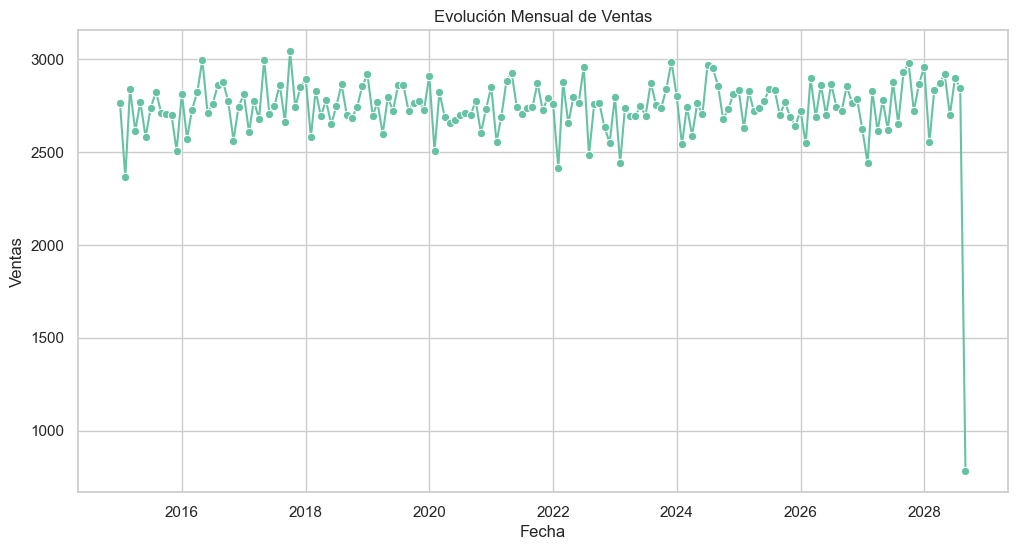

In [ ]:
# 15. Agregar la columna “Año” y “Mes” a partir de la fecha.
df['Año_Mes'] = df['Fecha'].dt.to_period('M') 

# 16. Agrupar los datos por mes y graficar la evolución mensual de las ventas.
ventas_mensuales = df.groupby('Año_Mes')['Ventas'].sum().reset_index()
ventas_mensuales['Año_Mes'] = ventas_mensuales['Año_Mes'].dt.to_timestamp() 

plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_mensuales, x='Año_Mes', y='Ventas', marker='o')
plt.xlabel('Fecha')
plt.title('Evolución Mensual de Ventas')
plt.show()

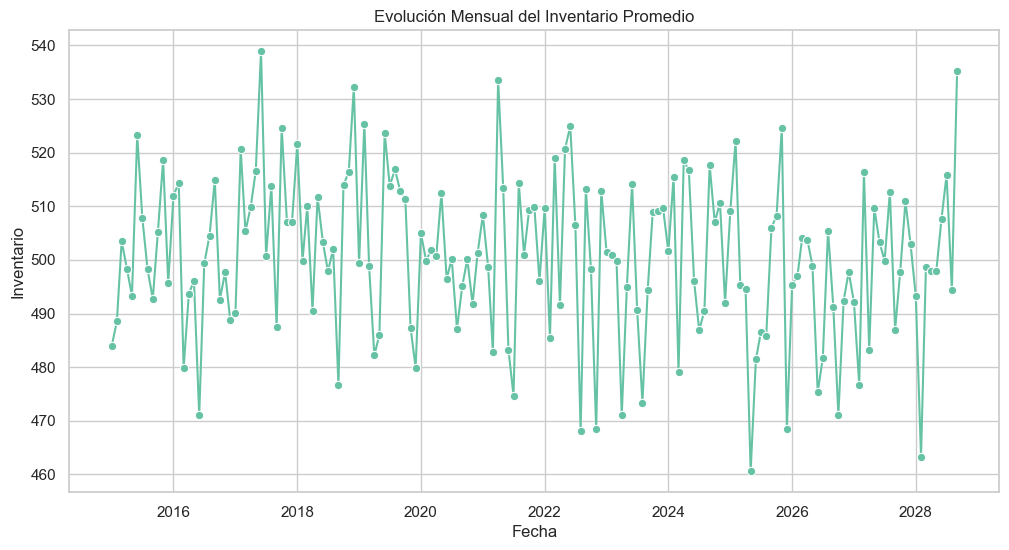

In [ ]:
# 17. Crear un gráfico de líneas mostrando cómo cambia el inventario promedio a lo largo del tiempo.
inventario_mensual = df.groupby('Año_Mes')['Inventario'].mean().reset_index()
inventario_mensual['Año_Mes'] = inventario_mensual['Año_Mes'].dt.to_timestamp() 

plt.figure(figsize=(12, 6))
sns.lineplot(data=inventario_mensual, x='Año_Mes', y='Inventario', marker='o')
plt.xlabel('Fecha')
plt.title('Evolución del Inventario Promedio')
plt.show()

# Discusión y recomendaciones (puntos 18 y 19)

De acuerdo con los coeficientes obtenidos en la regresión múltiple, las variables que presentan mayor impacto en las ventas son los eventos deportivos, el clima favorable y el canal de venta en línea. Esto indica que durante la ocurrencia de eventos deportivos o en días con buenas condiciones climáticas, las ventas tienden a incrementarse significativamente. Esto es consistente con la naturaleza del negocio, ya que es razonable suponer que las personas estén más motivadas a adquirir artículos deportivos cuando hay eventos de mayor interés como un clásico de fútbol, una carrera de atletismo o cuando el clima favorece las actividades al aire libre.

En cuanto al canal de ventas en línea, el modelo sugiere que una mayor participación del e-commerce se asocia con un aumento en las ventas totales. Esto puede atribuirse al alcance ampliado y la disponibilidad permanente que ofrece este canal, permitiendo a clientes de diferentes ciudades a acceder fácilmente a los productos.

Se recomienda que la empresa coordine campañas promocionales multicanal (tienda física y en línea) durante los períodos en los que se celebren eventos deportivos relevantes, a fin de maximizar su impacto comercial. Asimismo, para potenciar las ventas a través del canal en línea, sería estratégico implementar descuentos selectivos en productos de baja rotación, con el doble propósito de incentivar las compras y reducir la permanencia prolongada del inventario. Esto debe ir acompañado del mantenimiento preventivo y mejora continua de la plataforma digital, para garantizar una experiencia de usuario fluida y confiable.

# Preguntas para la sustentación

**1. ¿Qué canal muestra en promedio un mejor rendimiento en ventas?**

El canal e-commerce muestra un mejor rendimiento en promedio, según el coeficiente de regresión y su correlación positiva con las ventas.

**2. ¿Existe una relación clara entre el nivel de promoción y las ventas?**

Sí existe una relación, pero es débil. Lo cual implica que no todas las promociones necesariamente se traducen en ventas, posiblemente por campañas poco efectivas o que no están bien dirigidas.

**3. ¿Existe una relación clara entre el clima y las ventas?**

Sí. Esta es una de las variables con mayor correlación y coeficiente de regresión, lo cual significa que cuando las condiciones climáticas son adecuadas para actividades al aire libre, las ventas se incrementan considerablemente.

**4. ¿Qué sucede con las ventas cuando el inventario es bajo?**

Cuando el inventario es bajo, las ventas también tienden a disminuir. Esto se refleja en la correlación positiva entre inventario y ventas, siendo esta la cuarta más correlacionada. Además, la variable Dias_inventario indica que productos que permanecen más tiempo en stock se venden menos.

**5. ¿Cuál es el impacto promedio del canal e-commerce frente al físico en el modelo?**

En promedio las ventas aumentan en 15.6 unidades por cada venta en línea que se realiza. 

**6. ¿En qué meses se evidencian mayores picos de ventas?**

Los mayores picos tienden a ocurrir a finales e inicios de año. Esto puede estar relacionado con las compras navideñas o con las promociones realizadas en noviembre como el Black Friday o en enero en temporada de rebajas.

**7. ¿Qué variable muestra la correlación más alta con las ventas?**

La variable Eventos_deportivos (0.30).

**8. ¿Cuál modelo predice mejor las ventas: el simple o el múltiple?**

El modelo múltiple predice mucho mejor las ventas. Este presenta mejores resultados tanto para R² como para MSE:

* R² múltiple: 0.339 (más alto)
* MSE: 216 (más bajo)

Esto indica que el modelo múltiple explica mejor las ventas al incluir muchas más variables relevantes que al considerar solo una.

**9. ¿Qué decisiones estratégicas podría tomar la empresa para planificar mejor su inventario?**

* Ajustar el inventario según el calendario de eventos deportivos.
* Segmentar el inventario según el canal de venta para maximizar eficiencia logística según los productos más vendidos en cada uno.
* Usar modelos predictivos para estimar la demanda futura y evitar exceso/escasez de inventario.